# 라이브러리 임포트 및 데이터 읽어오기

In [1]:
import pandas as pd
import numpy as np
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"

In [3]:
master_table = pd.read_csv('./dataset/master_table_v6.csv')
point_table = pd.read_csv('./dataset/use_point_within_signup_N_days.csv')
# candidate_table = pd.read_csv('./dataset/candidate_chosen_ratio.csv')

# 테이블 분석하기

In [4]:
def cohort_cut(df):
    over50_cohort = df.loc[df['retention_day8'] >= 0.50]
    under50_cohort = df.loc[df['retention_day8'] < 0.50]
    return over50_cohort, under50_cohort

In [5]:
def cohort_cut_25(df):
    df['cohort_day'] = pd.to_datetime(df['first_vote']).dt.strftime("%m.%d")
    top_25_dates = ["04.30", "05.02", "05.09", "05.10", "05.12", "05.20", "05.21"]
    low_25_dates = ["05.04", "05.05", "05.06", "05.15", "05.16", "05.17", "05.24"]
    
    high_cohort = df.loc[df['cohort_day'].isin(top_25_dates)]
    low_cohort = df.loc[df['cohort_day'].isin(low_25_dates)]

    return high_cohort, low_cohort

In [6]:
def result_print(df, func, integrated = 0):
    if integrated != 0:
        high_cohort, low_cohort = cohort_cut_25(df)
        high_분석 = func(high_cohort)
        low_분석 = func(low_cohort)
        
        print('High-25%')
        display(high_분석)
        print('='*100)
        print('Low-25%')
        display(low_분석)
   
    else:
        over50_cohort, under50_cohort = cohort_cut(df)
        over50_분석 = func(over50_cohort)
        under50_분석 = func(under50_cohort)
        
        print('Over50')
        display(over50_분석)
        print('='*100)
        print('Under50')
        display(under50_분석)
    
    return

## candidate, point 분석

In [8]:
user_table = master_table[['user_id','total_votes','unique_days','retention_day8','gender','school_id','grade']]
user_table = user_table.merge(point_table, on='user_id',how='left')
user_table = user_table.merge(candidate_table, on='user_id', how='left')
user_table

,user_id,total_votes,unique_days,retention_day8,gender,school_id,grade,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,point_used_within_signup_3days,candidate_count,chosen_user_id,chosen_count,ratio
0,838023,22,5,0.515152,F,271.0,1.0,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,-300.0,0,0,27.0,838023.0,10.0,0.370370
1,838466,127,6,0.569444,F,369.0,2.0,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,-300.0,0,0,82.0,838466.0,37.0,0.451220
2,838642,1,1,0.515152,F,271.0,2.0,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,-300.0,0,0,44.0,838642.0,5.0,0.113636
3,839357,205,8,0.515152,M,271.0,1.0,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,-300.0,0,0,42.0,839357.0,10.0,0.238095
4,840293,170,7,0.422977,F,369.0,1.0,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,-300.0,0,0,74.0,840293.0,31.0,0.418919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,0.451613,M,4426.0,2.0,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,-200.0,1,1,NaN,NaN,NaN,NaN
4699,1511957,8,1,0.451613,F,5520.0,2.0,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,NaN,1,0,NaN,NaN,NaN,NaN
4700,1512422,22,1,0.451613,F,4426.0,2.0,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,-10.0,1,1,NaN,NaN,NaN,NaN
4701,1512542,7,1,0.451613,F,4426.0,2.0,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,-200.0,1,1,NaN,NaN,NaN,NaN


In [9]:
def candidate_analysis(df):
    result = df.agg({
    'first_point_use_amount': 'mean',
    'vote_sameday_signup': 'mean',
    'candidate_count': 'sum',
    'chosen_count': 'sum',
    'total_votes':'sum',
    'unique_days':'sum',
    'grade':'mean'
})
    result['chosen_ratio'] = result['chosen_count'] / result['candidate_count']
    result['vote_per_day'] = result['total_votes'] / result['unique_days']

    return result.reset_index()

In [10]:
result_print(user_table, candidate_analysis)

Over50


,index,0
0,first_point_use_amount,-272.830084
1,vote_sameday_signup,0.778684
2,candidate_count,99609.000000
3,chosen_count,33720.000000
4,total_votes,457737.000000
5,unique_days,15878.000000
6,grade,1.824905
7,chosen_ratio,0.338524
8,vote_per_day,28.828379


Under50


,index,0
0,first_point_use_amount,-273.762963
1,vote_sameday_signup,0.822626
2,candidate_count,121998.000000
3,chosen_count,41175.000000
4,total_votes,554561.000000
5,unique_days,20280.000000
6,grade,1.890014
7,chosen_ratio,0.337506
8,vote_per_day,27.345217


#### 해석
- point_use_amount -300 << 첫 포인트가 투표 선택된 것에 사용한 서비스
- point_use_amount -200 << 사용처를 알 수 없음. 선택받은 적 없는 사람도 사용 가능한 포인트 서비스
- 따라서 -300에 가까울수록 투표 관련하여 포인트를 사용했다고 볼 수 있다. 그러나 유의미한 차이가 없음.
    

- vote_sameday_signup << 가입 첫 날 바로 활성화된 비율. 77% vs 82% 인 상황. 약간의 차이가 있기는 하지만 유의미한 차이라고 보이진 않음.


- ratio << 후보 등장 대비 선택받은 비율. 두 집단 모두 33% 로 사실상 무차별한 것으로 보임.

## VOTE POINT within after N days

In [11]:
import warnings
# SettingWithCopyWarning 무시
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [12]:
user_table = master_table[['user_id','total_votes','unique_days','retention_day8','gender','school_id','grade']]
user_table = user_table.merge(point_table, on='user_id',how='left')
user_table = user_table.merge(candidate_table, on='user_id', how='left')
user_table

,user_id,total_votes,unique_days,retention_day8,gender,school_id,grade,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,point_used_within_signup_3days,candidate_count,chosen_user_id,chosen_count,ratio
0,838023,22,5,0.515152,F,271.0,1.0,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,-300.0,0,0,27.0,838023.0,10.0,0.370370
1,838466,127,6,0.569444,F,369.0,2.0,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,-300.0,0,0,82.0,838466.0,37.0,0.451220
2,838642,1,1,0.515152,F,271.0,2.0,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,-300.0,0,0,44.0,838642.0,5.0,0.113636
3,839357,205,8,0.515152,M,271.0,1.0,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,-300.0,0,0,42.0,839357.0,10.0,0.238095
4,840293,170,7,0.422977,F,369.0,1.0,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,-300.0,0,0,74.0,840293.0,31.0,0.418919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,0.451613,M,4426.0,2.0,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,-200.0,1,1,NaN,NaN,NaN,NaN
4699,1511957,8,1,0.451613,F,5520.0,2.0,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,NaN,1,0,NaN,NaN,NaN,NaN
4700,1512422,22,1,0.451613,F,4426.0,2.0,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,-10.0,1,1,NaN,NaN,NaN,NaN
4701,1512542,7,1,0.451613,F,4426.0,2.0,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,-200.0,1,1,NaN,NaN,NaN,NaN


### VOTE

In [13]:
date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

In [14]:
# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'vote_within_{i}days'] = (date_user_table['days_to_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['vote_over_7days'] = (date_user_table['days_to_vote'] > 7).astype(int)

In [15]:
def within_days_analysis(df):
    df = df.drop(columns=['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date'])
    result = df.mean()
    return result.reset_index()

In [16]:
result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_vote,0.542142
1,vote_within_1days,0.899946
2,vote_within_2days,0.929853
3,vote_within_3days,0.942904
4,vote_within_4days,0.960848
5,vote_within_5days,0.964111
6,vote_within_6days,0.977162
7,vote_over_7days,0.019032


Under50


,index,0
0,days_to_vote,0.272696
1,vote_within_1days,0.952514
2,vote_within_2days,0.969623
3,vote_within_3days,0.979050
4,vote_within_4days,0.984986
5,vote_within_5days,0.988128
6,vote_within_6days,0.990223
7,vote_over_7days,0.008380


#### 해석
- 전반적으로 under50 이 가입대비 더 이른시점에 투표를 진행하는 것으로 보인다.
- 이렇게 된 이후는, signup day 가 4.19일 등의 시점이지만, 실제 투표가 기록되는 날짜는 4.28일 이후임에 따라서    
4.28~5.1에 해당하는 초반부 코호트가 over50 코호트로 잡히면서 발생한 문제가 아닐까 싶다.

- 가장 대표적으로 확인할 수 있는게, 첫 투표까지 걸린 기간이 0.54일인데 비해, under50 코호트에서 0.27일로 4명중 3명은 회원 가입 당일에 바로 투표 서비스를 이용했다 처럼 보이는 것.

### POINT

In [17]:
## 포인트 기록

date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}days'] = (date_user_table['days_to_point'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7days'] = (date_user_table['days_to_point'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point,1.335933
1,point_within_1days,0.793910
2,point_within_2days,0.846112
3,point_within_3days,0.874932
4,point_within_4days,0.895595
5,point_within_5days,0.909190
6,point_within_6days,0.928222
7,point_over_7days,0.037520


Under50


,index,0
0,days_to_point,1.064444
1,point_within_1days,0.800279
2,point_within_2days,0.854749
3,point_within_3days,0.879190
4,point_within_4days,0.895251
5,point_within_5days,0.905377
6,point_within_6days,0.913408
7,point_over_7days,0.027584


#### 해석
- SIGNUP DATE 가 기준이 되었기 때문에, 역시나 POINT 사용 역시 OVER50 코호트에서 평균적으로 좀 더 지연된 경향이 있다.

### POINT USE AFTER VOTE

In [18]:
## VOTE 대비 POINT TIME
date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}vote_days'] = (date_user_table['days_to_point_after_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7vote_days'] = (date_user_table['days_to_point_after_vote'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point_after_vote,0.657939
1,point_within_1vote_days,0.878738
2,point_within_2vote_days,0.912996
3,point_within_3vote_days,0.934747
4,point_within_4vote_days,0.944535
5,point_within_5vote_days,0.952692
6,point_within_6vote_days,0.955954
7,point_over_7vote_days,0.016313


Under50


,index,0
0,days_to_point_after_vote,0.674444
1,point_within_1vote_days,0.849860
2,point_within_2vote_days,0.888268
3,point_within_3vote_days,0.900838
4,point_within_4vote_days,0.913059
5,point_within_5vote_days,0.918296
6,point_within_6vote_days,0.921439
7,point_over_7vote_days,0.020251


#### 해석
- SIGNUP이 문제라면, VOTE 대비로 봐보면 다를까?
    - 이전 결과와 달리, 평균 0.66일로 두 코호트간 차이가 거의 없는것으로 나타난다.
    - 다만 세부적으로, Over50 그룹이 조금 더 투표날 대비 포인트 사용날이 더 빠른것으로 추정된다.

## 유저가 처음 투표한 시간, 선호하는 시간

### 처음 투표한 시간

In [19]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour
user_table

,user_id,retention_day8,first_vote_date,first_vote_hour
0,838023,0.515152,2023-04-29 16:22:56,16
1,838466,0.569444,2023-05-02 22:42:05,22
2,838642,0.515152,2023-04-28 14:18:07,14
3,839357,0.515152,2023-04-29 16:51:01,16
4,840293,0.422977,2023-05-03 02:24:05,2
...,...,...,...,...
4698,1510561,0.451613,2023-05-25 14:28:20,14
4699,1511957,0.451613,2023-05-25 15:46:25,15
4700,1512422,0.451613,2023-05-25 16:57:53,16
4701,1512542,0.451613,2023-05-25 22:59:47,22


## 첫 날 투표건수

In [20]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')
user_table

,user_id,retention_day8,sign_up_date,first_vote_date,first_point_use_date,vote_sameday_signup
0,838023,0.515152,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,0
1,838466,0.569444,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,0
2,838642,0.515152,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,0
3,839357,0.515152,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,0
4,840293,0.422977,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,0
...,...,...,...,...,...,...
4698,1510561,0.451613,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,1
4699,1511957,0.451613,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,1
4700,1512422,0.451613,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,1
4701,1512542,0.451613,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,1


### 투표한 첫 날 투표 건수

In [21]:
qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['first_vote_date']).dt.floor('d')

In [22]:
merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)
merged_table

,user_id,retention_day8,day,question_count
0,838023,0.515152,2023-04-29,1
1,838466,0.569444,2023-05-02,9
10,838642,0.515152,2023-04-28,9
19,839357,0.515152,2023-04-29,1
20,840293,0.422977,2023-05-03,52
...,...,...,...,...
137084,1510561,0.451613,2023-05-25,9
137093,1511957,0.451613,2023-05-25,8
137101,1512422,0.451613,2023-05-25,22
137123,1512542,0.451613,2023-05-25,7


In [23]:
def first_voteday_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8','day'])
    result = df.mean()
    return result.reset_index()

In [24]:
result_print(merged_table, first_voteday_anaylsis)

Over50


,index,0
0,question_count,27.392061


Under50


,index,0
0,question_count,30.294344


### 가입한 첫 날 투표 건수

In [25]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')
# user_table = user_table.loc[user_table['vote_sameday_signup'] == 1]

qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['sign_up_date']).dt.floor('d')


merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)
display(merged_table)

result_print(merged_table, first_voteday_anaylsis)

,user_id,retention_day8,day,question_count
0,838023,0.515152,2023-04-19,1
1,838466,0.569444,2023-04-19,1
2,838642,0.515152,2023-04-20,1
3,839357,0.515152,2023-04-20,1
4,840293,0.422977,2023-04-21,1
...,...,...,...,...
111811,1510561,0.451613,2023-05-25,9
111820,1511957,0.451613,2023-05-25,8
111828,1512422,0.451613,2023-05-25,22
111850,1512542,0.451613,2023-05-25,7


Over50


,index,0
0,question_count,21.323002


Under50


,index,0
0,question_count,25.366969


## 첫 날 열람 건수

In [26]:
def has_read_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8'])

    result = {
        'total_voted_mean' : df['total_voted'].mean().round(3),
        'total_voted_sum' : df['total_voted'].sum(),
        'total_read_mean' : df['total_read'].mean().round(3),
        'total_read_sum' : df['total_read'].sum(),
        'read_per_vote' : round((df['total_read'].sum() / df['total_voted'].sum()),3)
    }
    return result

In [27]:
record = ds.votes.accounts_userquestionrecord()
has_read_table = record[['chosen_user_id','has_read','id']].copy()

user_table = master_table[['user_id','retention_day8']].copy()

In [28]:
has_read_table['total_voted'] =  (
    has_read_table
    .groupby(['chosen_user_id'])['id']
    .transform('count')
)
has_read_table['total_read'] = (
    has_read_table
    .groupby(['chosen_user_id'])['has_read']
    .transform('sum')
)
has_read_table = has_read_table[['chosen_user_id','total_voted','total_read']].rename(columns={'chosen_user_id':'user_id'}).drop_duplicates(subset='user_id')

In [29]:
user_table = user_table.merge(
    has_read_table,
    on='user_id',
    how='left'
)

user_table

,user_id,retention_day8,total_voted,total_read
0,838023,0.515152,262.0,0.0
1,838466,0.569444,343.0,19.0
2,838642,0.515152,40.0,10.0
3,839357,0.515152,173.0,15.0
4,840293,0.422977,241.0,39.0
...,...,...,...,...
4698,1510561,0.451613,37.0,37.0
4699,1511957,0.451613,149.0,133.0
4700,1512422,0.451613,51.0,51.0
4701,1512542,0.451613,87.0,86.0


In [30]:
result_print(user_table, has_read_anaylsis)

Over50


{'total_voted_mean': 264.298,
 'total_voted_sum': 485780.0,
 'total_read_mean': 147.486,
 'total_read_sum': 271079.0,
 'read_per_vote': 0.558}

Under50


{'total_voted_mean': 192.009,
 'total_voted_sum': 548185.0,
 'total_read_mean': 108.68,
 'total_read_sum': 310280.0,
 'read_per_vote': 0.566}

# 테이블 완성하기

In [31]:
def table_merging(master_table, merge_table):
    result = master_table.merge(
    merge_table,
    on = 'user_id',
    how='left'
).copy()
    return result

In [32]:
import warnings
# SettingWithCopyWarning 무시
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [33]:
# 가입 후 7일 이내 결제 유무
date_user_table = point_table[['user_id','sign_up_date','first_vote_date','first_point_use_date','first_point_use_amount','vote_sameday_signup']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

final_master_table = table_merging(master_table, date_user_table)

In [34]:
# 투표 등장 대비 선택받은 비율
final_master_table = table_merging(final_master_table, candidate_table.drop(columns='chosen_user_id'))

In [35]:
# 처음 투표한 시간
user_table = master_table[['user_id']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour

final_master_table = table_merging(final_master_table, user_table[['user_id','first_vote_hour']])
final_master_table

,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,ret_group_over,...,first_point_use_date,first_point_use_amount,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,candidate_count,chosen_count,ratio,first_vote_hour
0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 14:27:35,-300.0,0,10,11.0,0.0,27.0,10.0,0.370370,16
1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,50 이상,...,2023-05-05 07:32:34,-300.0,0,13,15.0,2.0,82.0,37.0,0.451220,22
2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 06:49:01,-300.0,0,8,10.0,1.0,44.0,5.0,0.113636,14
3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 02:19:41,-300.0,0,9,9.0,0.0,42.0,10.0,0.238095,16
4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,NaN,...,2023-05-05 14:49:11,-300.0,0,11,14.0,2.0,74.0,31.0,0.418919,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-26 15:24:26,-200.0,1,0,1.0,1.0,NaN,NaN,NaN,14
4699,1511957,8,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,15
4700,1512422,22,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-25 17:09:17,-10.0,1,0,0.0,0.0,NaN,NaN,NaN,16
4701,1512542,7,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-26 11:28:52,-200.0,1,0,0.0,0.0,NaN,NaN,NaN,22


# 랜포
y 종속변수 : retention_day8    
x 독립변수 : 나머지 파생

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [37]:
import pandas as pd

master_table = pd.read_csv('./integrated_master_table.csv')
master_table = master_table.drop(columns=['ret_group','ret_group_over','ret_group_under'])
master_table = master_table.rename(columns={'ratio':'chosen_ratio'})

In [38]:
master_table.columns

Index(['user_id', 'total_votes', 'unique_days', 'first_vote', 'last_vote',
       'active_days', 'cohort_day', 'retention_day8', 'gender', 'group_id',
       'school_id', 'grade', 'votes_within_3d_count', 'reported_user_count',
       'vote_nunique_user_count', 'period_friend_count', 'sign_up_date',
       'first_vote_date', 'first_point_use_date', 'first_point_use_amount',
       'vote_sameday_signup', 'days_to_vote', 'days_to_point',
       'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_voted', 'total_read',
       'opposite_sex_votes_received_count', 'opposite_sex_vote_received_ratio',
       'candidate_count', 'chosen_count', 'chosen_ratio', 'address',
       'student_count', 'school_type', 'firstquestion_id',
       'first_question_text', 'first_question_category'],
      dtype='object')

### v6_분석

In [124]:
user_table.columns

Index(['total_votes', 'unique_days', 'first_vote', 'active_days', 'cohort_day',
       'retention_day8', 'gender', 'school_id', 'grade', 'group_id',
       'votes_within_3d', 'period_friend_count', 'retention_group',
       'student_count', 'school_type', 'firstquestion_id', 'chosen_count',
       'first_point_use_amount', 'vote_sameday_signup', 'days_to_vote',
       'days_to_point', 'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_votes_per_uniqueday',
       'chosen_count_per_uniqueday'],
      dtype='object')

0.5634642698808923
Feature Importances: [0.00845945 0.04198795 0.01190176 0.04059175 0.14928639 0.15705826
 0.01280217 0.02213791 0.05244878 0.0208263  0.00343264 0.00509219
 0.00846555 0.01262005 0.03397829 0.04044646 0.07907883 0.29938525]


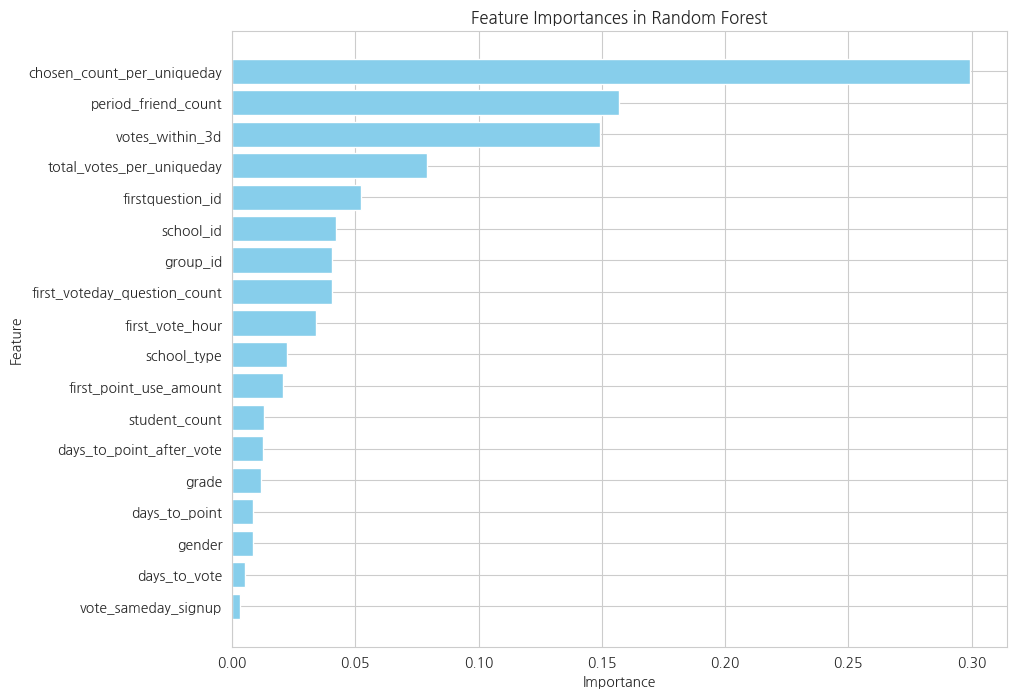

In [127]:
# v6 usertablee
regressor_table = user_table.copy()

# nan 값 및 독립변수로 쓸 수 없는 컬럼 제거
regressor_table = regressor_table.drop(columns=[
    'chosen_count','total_votes','first_vote','cohort_day','retention_group','retention_day8','active_days']
    ).fillna(0)


y = regressor_table['unique_days']
X = regressor_table.drop(columns=['unique_days'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

print("Feature Importances:", rf.feature_importances_)


import matplotlib.pyplot as plt
col_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': rf.feature_importances_
})

# 중요도가 높은 순으로 정렬
col_importance = col_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(col_importance['Feature'], col_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()


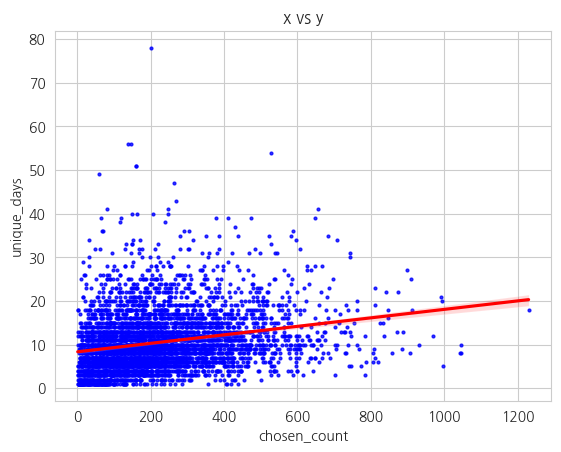

In [143]:
# v6 상관성 시각화
plt.Figure(figsize=(10,6))
sns.regplot(x='chosen_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


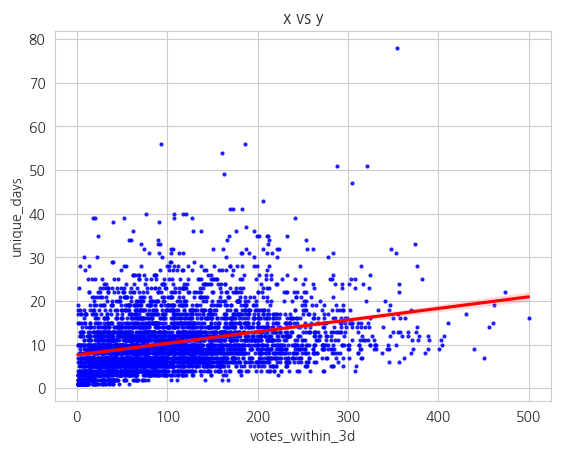

In [129]:
# v6 상관성 시각화
plt.Figure(figsize=(10,6))
sns.regplot(x='votes_within_3d', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


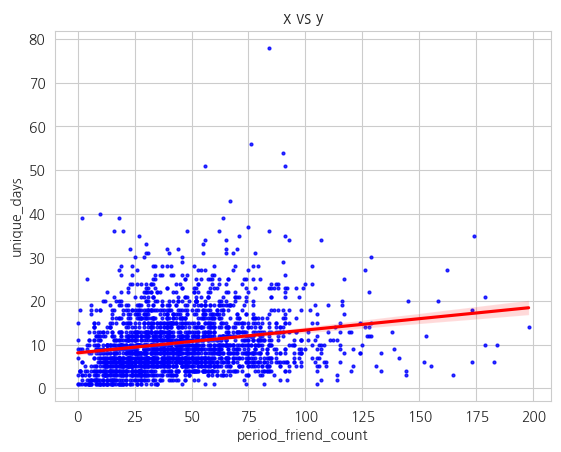

In [89]:
# v6 상관성 시각화
plt.Figure(figsize=(10,6))
sns.regplot(x='period_friend_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


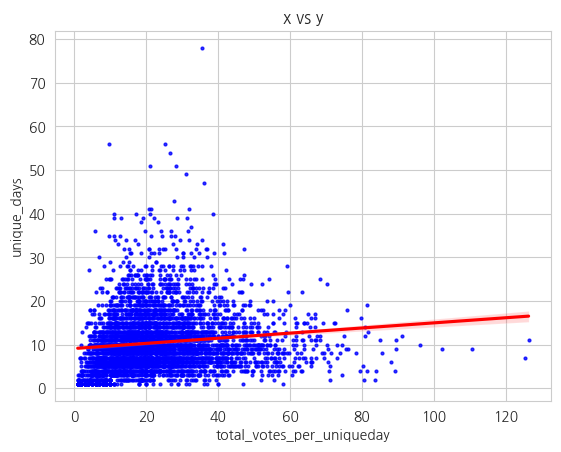

In [130]:
# v6 상관성 시각화
plt.Figure(figsize=(10,6))
sns.regplot(x='total_votes_per_uniqueday', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


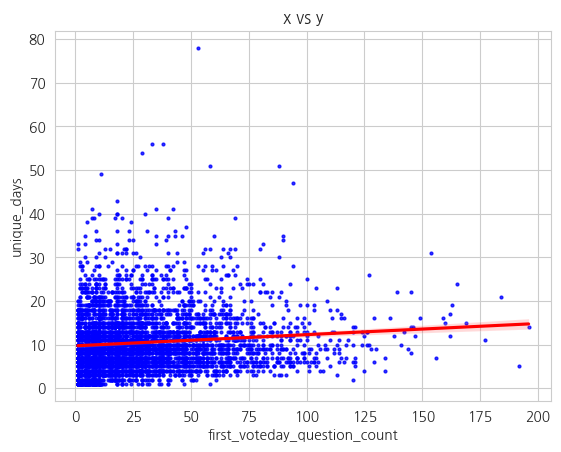

In [131]:
# v6 상관성 시각화
plt.Figure(figsize=(10,6))
sns.regplot(x='first_voteday_question_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


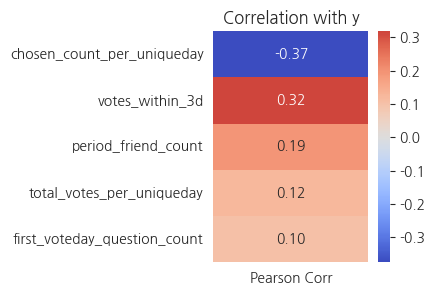

In [136]:
# v6 상관성 피어슨 분석 및 시각화
from scipy.stats import pearsonr

target_cols = ['unique_days','chosen_count_per_uniqueday', 'votes_within_3d', 'period_friend_count', 'total_votes_per_uniqueday', 'first_voteday_question_count']

# y와의 상관계수만 추출 (y 자신 제외)
corr_with_y = user_table[target_cols].corr(method='pearson')['unique_days'].drop('unique_days').to_frame(name='Pearson Corr')

# 히트맵처럼 세로로 시각화
plt.figure(figsize=(2.5, len(corr_with_y) * 0.6))
sns.heatmap(corr_with_y, annot=True, fmt=".2f", cmap='coolwarm', center=0, cbar=True)

plt.title('Correlation with y')
plt.show()

In [133]:
user_table[target_cols].columns

Index(['unique_days', 'chosen_count_per_uniqueday', 'votes_within_3d',
       'period_friend_count', 'total_votes_per_uniqueday',
       'first_voteday_question_count'],
      dtype='object')

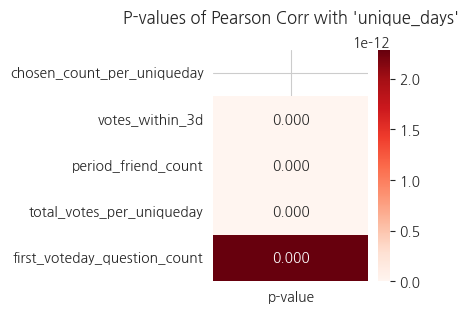

In [135]:
# 피어슨 p_value

p_values = {}
for x in user_table[target_cols].drop(columns='unique_days').columns:
    _, p = pearsonr(user_table[x], user_table['unique_days'])
    p_values[x] = p

# DataFrame으로 정리
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# 히트맵 시각화
plt.figure(figsize=(2.5, len(pval_df) * 0.6))
sns.heatmap(pval_df, annot=True, fmt=".3f", cmap='Reds', cbar=True)
plt.title(f"P-values of Pearson Corr with 'unique_days'", pad=20)
plt.show()

In [ ]:
user_table.drop(columns=['first_vote','cohort.day'])

,total_votes,unique_days,first_vote,active_days,cohort_day,retention_day8,gender,school_id,grade,group_id,...,chosen_count,first_point_use_amount,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,first_vote_hour,first_voteday_question_count,total_votes_per_uniqueday,chosen_count_per_uniqueday
0,22,5,2023-04-29,5,04.29,0.515152,1,271.0,1.0,233.0,...,262.0,-300.0,0,10,11.0,0.0,16,1,4.40,52.40
1,129,7,2023-05-02,31,05.02,0.569444,1,369.0,2.0,321.0,...,342.0,-300.0,0,13,15.0,2.0,22,9,18.43,48.86
2,10,2,2023-04-28,1,04.28,0.560000,1,271.0,2.0,356.0,...,40.0,-300.0,0,8,10.0,1.0,14,9,5.00,20.00
3,212,9,2023-04-29,27,04.29,0.515152,0,271.0,1.0,519.0,...,173.0,-300.0,0,9,9.0,0.0,16,1,23.56,19.22
4,170,7,2023-05-03,12,05.03,0.422977,1,369.0,1.0,838.0,...,241.0,-300.0,0,11,14.0,2.0,2,52,24.29,34.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,475,19,2023-05-25,19,05.25,0.451613,0,4426.0,2.0,73885.0,...,37.0,-200.0,1,0,1.0,1.0,14,9,25.00,1.95
4699,103,11,2023-05-25,18,05.25,0.451613,1,5520.0,2.0,29558.0,...,146.0,NaN,1,0,NaN,NaN,15,8,9.36,13.27
4700,243,8,2023-05-25,7,05.25,0.451613,1,4426.0,2.0,72313.0,...,51.0,-10.0,1,0,0.0,0.0,16,22,30.38,6.38
4701,636,12,2023-05-25,12,05.25,0.451613,1,4426.0,2.0,72313.0,...,86.0,-200.0,1,0,0.0,0.0,22,7,53.00,7.17


/home/project4_machine/project4/google_cloud/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


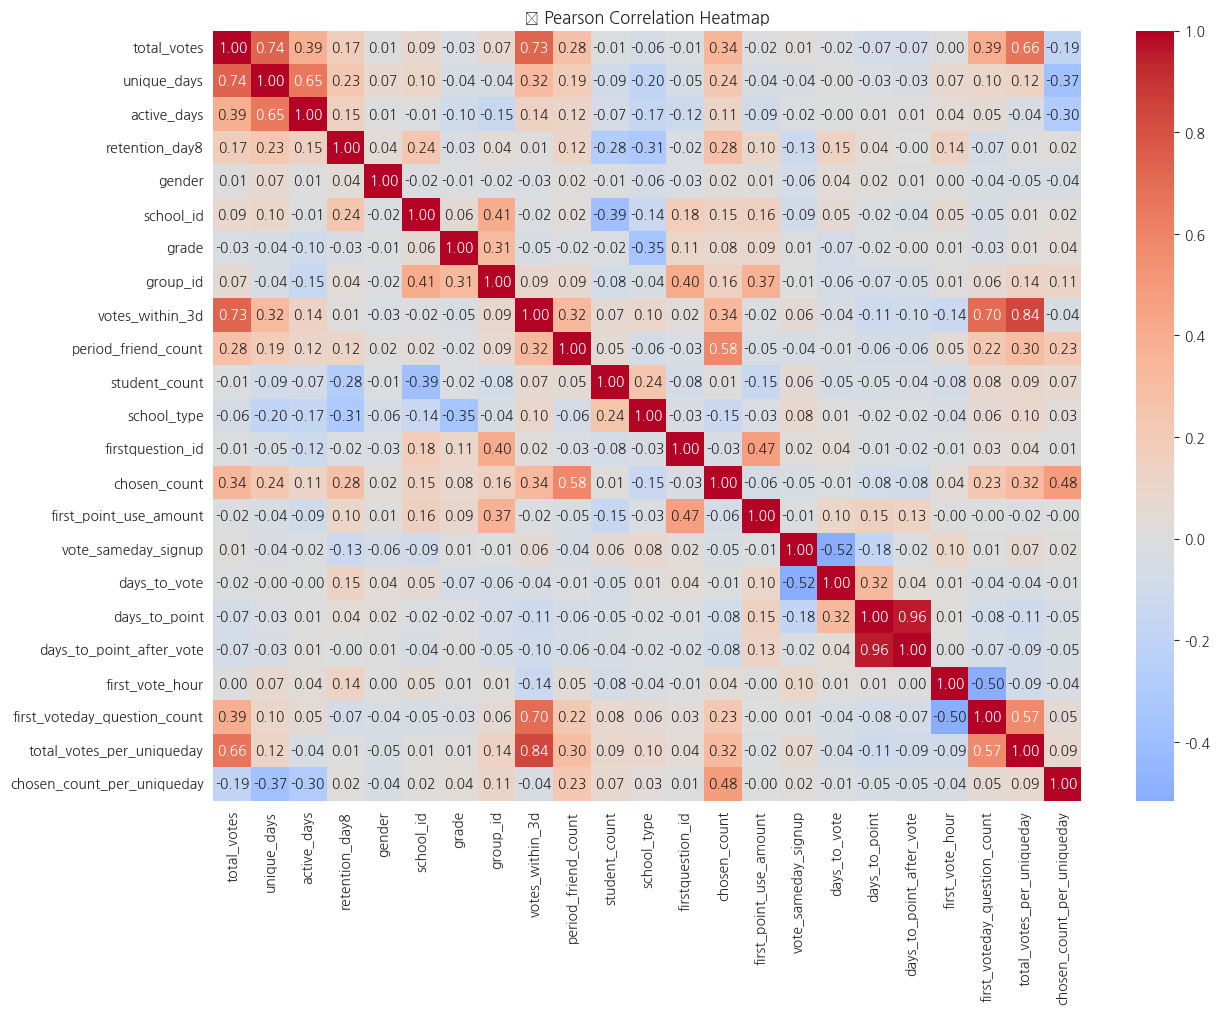

In [142]:
# 전체 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

# 예: df의 연속형 수치 변수들만 대상으로
corr_matrix = user_table.drop(columns=['first_vote','cohort_day','retention_group']).corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("📊 Pearson Correlation Heatmap")
plt.show()


#### 회귀 (Chosen Count가 Unique Days에 의해 얼만큼 설명되는가?)

In [146]:
user_table.isna().sum()

total_votes                       0
unique_days                       0
first_vote                        0
active_days                       0
cohort_day                        0
retention_day8                    0
gender                            0
school_id                         0
grade                             0
group_id                          0
votes_within_3d                   0
period_friend_count               0
retention_group                   0
student_count                     0
school_type                       0
firstquestion_id                  0
chosen_count                     11
first_point_use_amount          208
vote_sameday_signup               0
days_to_vote                      0
days_to_point                   208
days_to_point_after_vote        208
first_vote_hour                   0
first_voteday_question_count      0
total_votes_per_uniqueday         0
chosen_count_per_uniqueday       11
dtype: int64

In [ ]:
# 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
linear_df = user_table[['unique_days','chosen_count']].fillna(0).copy()

X_std = StandardScaler().fit_transform(linear_df[['unique_days']])
y_std = StandardScaler().fit_transform(linear_df[['chosen_count']])

model = LinearRegression().fit(X_std, y_std)
print(f"표준화 회귀계수 (β): {model.coef_[0][0]:.3f}")

r2 = model.score(X_std, y_std)
print(f"R²: {r2:.3f}")

표준화 회귀계수 (β): 0.238
R²: 0.057


In [ ]:
linear_df = user_table[['unique_days','chosen_count']].fillna(0).copy()

# X_std = StandardScaler().fit_transform(linear_df[['chosen_count']])
# y_std = StandardScaler().fit_transform(linear_df[['unique_days']])

X_std = linear_df[['chosen_count']]
y_std = linear_df[['unique_days']]

model = LinearRegression().fit(X_std, y_std)
print(f"표준화 회귀계수 (β): {model.coef_[0][0]:.3f}")

r2 = model.score(X_std, y_std)
print(f"R²: {r2:.3f}")

print("-" * 30)
#  = StandardScaler().fit_transform(linear_df[['unique_days']])
# y_std = StandardScaler().fit_transform(linear_df[['chosen_count']])
print(f"REVERSE : 활동일이 득표수에 영향을 주는가?")

X_std = linear_df[['unique_days']]
y_std = linear_df[['chosen_count']]

model = LinearRegression().fit(X_std, y_std)
print(f"표준화 회귀계수 (β): {model.coef_[0][0]:.3f}")

r2 = model.score(X_std, y_std)
print(f"R²: {r2:.3f}")

표준화 회귀계수 (β): 0.010
R²: 0.057
------------------------------
REVERSE : 활동일이 득표수에 영향을 주는가?
표준화 회귀계수 (β): 5.771
R²: 0.057


In [158]:
linear_df = user_table[['unique_days','period_friend_count']].fillna(0).copy()
X_std = linear_df[['period_friend_count']]
y_std = linear_df[['unique_days']]

model = LinearRegression().fit(X_std, y_std)
print(f"회귀계수 (β): {model.coef_[0][0]:.3f}")

r2 = model.score(X_std, y_std)
print(f"R²: {r2:.3f}")

회귀계수 (β): 0.043
R²: 0.037


### Integrated Table 분석

In [39]:
regressor_table = master_table.copy()
gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
regressor_table['gender'] = regressor_table['gender'].map(gender_dic)
regressor_table['school_type'] = regressor_table['school_type'].map(school_dic)

## VOTE 대비 POINT TIME
regressor_table['sign_up_date'] = pd.to_datetime(regressor_table['sign_up_date'])
regressor_table['first_vote_date'] = pd.to_datetime(regressor_table['first_vote_date'])
regressor_table['first_point_use_date'] = pd.to_datetime(regressor_table['first_point_use_date'])

# 조건 컬럼
regressor_table['days_to_point_after_vote'] = (regressor_table['first_point_use_date'] - regressor_table['first_vote_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'point_within_{i}vote_days'] = (regressor_table['days_to_point_after_vote'] <= i).astype(int)

# 7일 초과 투표
regressor_table['point_over_7vote_days'] = (regressor_table['days_to_point_after_vote'] > 7).astype(int)

# 조건 컬럼
regressor_table['days_to_point'] = (regressor_table['first_point_use_date'] - regressor_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'point_within_{i}days'] = (regressor_table['days_to_point'] <= i).astype(int)

# 7일 초과 투표
regressor_table['point_over_7days'] = (regressor_table['days_to_point'] > 7).astype(int)

# 조건 컬럼
regressor_table['days_to_vote'] = (regressor_table['first_vote_date'] - regressor_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'vote_within_{i}days'] = (regressor_table['days_to_vote'] <= i).astype(int)

# 7일 초과 투표
regressor_table['vote_over_7days'] = (regressor_table['days_to_vote'] > 7).astype(int)

# nan 값 및 독립변수로 쓸 수 없는 컬럼 제거
regressor_table = regressor_table.drop(columns=[
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'first_vote','last_vote','cohort_day']
    ).fillna(0)


In [40]:
exclude_list = ['point_over_7vote_days','point_over_7days','vote_over_7days','reported_user_count','gender','opposite_sex_votes_received_count','candidate_count','active_days','total_voted']
regressor_table2 = regressor_table.drop(columns=exclude_list).copy()

In [41]:
y = regressor_table2['retention_day8']
X = regressor_table2.drop(columns=['retention_day8'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

print("Feature Importances:", rf.feature_importances_)

0.5943610077950847
Feature Importances: [0.0229065  0.08141341 0.06105973 0.10686362 0.03008476 0.03120209
 0.02503955 0.04322549 0.01292845 0.00713147 0.02147771 0.0110378
 0.01022157 0.07001863 0.02321996 0.03698424 0.03206667 0.08317569
 0.03205015 0.11913791 0.08790814 0.05084645]


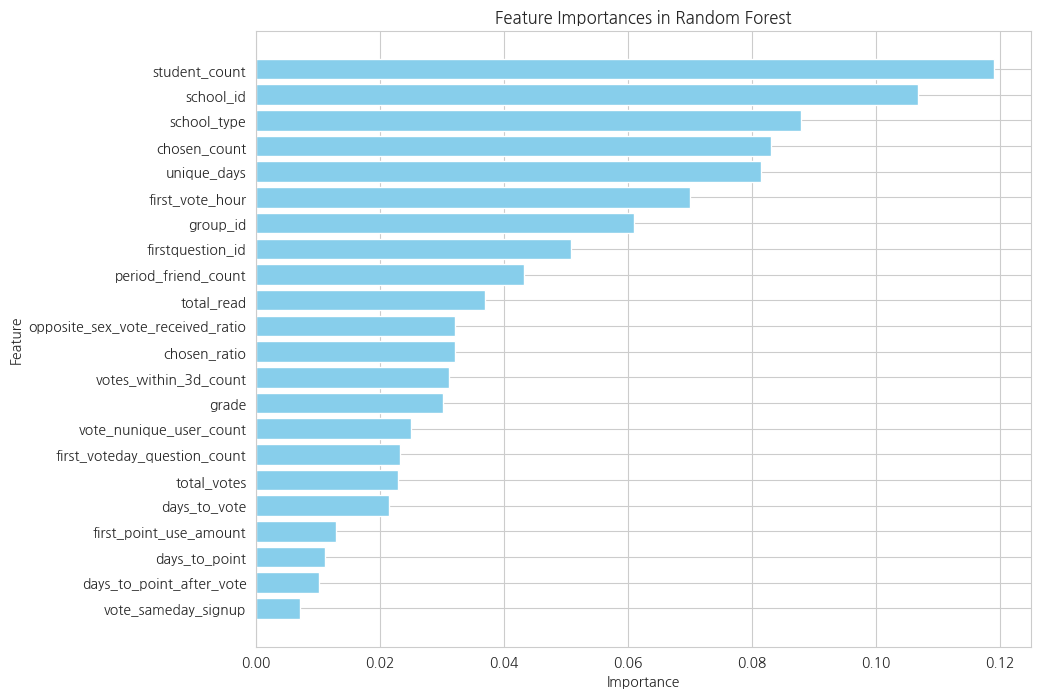

In [42]:
import matplotlib.pyplot as plt
col_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': rf.feature_importances_
})

# 중요도가 높은 순으로 정렬
col_importance = col_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(col_importance['Feature'], col_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()

## 해석
- 지금까지의 변수들로 유의미한 정보는 파악하기 어렵지만, school_id의 관여율이 높은걸로 봐서 특정 학교의 retention이 높을 수 있다는 생각을 해보아야 할 지도

# 마스터 테이블 분석하기

In [7]:
def per_day_cal(numerator, denominator):
    result = np.where(
    denominator == 0,
    numerator / 1,
    numerator / denominator
    )
    return np.round(result,2)

In [10]:
master_table.columns

Index(['user_id', 'total_votes', 'unique_days', 'first_vote', 'last_vote',
       'active_days', 'cohort_day', 'retention_day8', 'gender', 'school_id',
       'grade', 'group_id', 'votes_within_3d', 'period_friend_count',
       'retention_group', 'address', 'student_count', 'school_type',
       'firstquestion_id', 'first_question_text', 'first_question_category',
       'chosen_count', 'sign_up_date', 'first_vote_date',
       'first_point_use_date', 'first_point_use_amount', 'vote_sameday_signup',
       'days_to_vote', 'days_to_point', 'days_to_point_after_vote',
       'first_vote_hour', 'first_voteday_question_count'],
      dtype='object')

In [28]:
def table_v6_analysis(df):
    result = df.agg({
    'total_votes': 'mean',
    'unique_days': 'mean',
    'active_days': 'mean',
    'total_votes_per_uniqueday': 'mean',
    'gender': 'mean',
    'grade':'mean',
    'votes_within_3d':'mean',
    'period_friend_count':'mean',
    'first_point_use_amount':'mean',
    'vote_sameday_signup':'mean',
    'days_to_vote':'mean',
    'days_to_point':'mean',
    'days_to_point_after_vote':'mean',
    'first_voteday_question_count':'mean',
    'chosen_count':'mean',
    'chosen_count_per_uniqueday' :'mean',
    'student_count':'mean',
    'school_type':'mean'
    })
    
    return result.reset_index()

In [ ]:
def integrated_anaylsis(df):
    result = df.agg({
    'total_votes': 'mean',
    'unique_days': 'mean',
    'active_days': 'mean',
    'total_votes_per_uniqueday': 'mean',
    'total_votes_per_acitiveday': 'mean',
    'gender': 'mean',
    'unique_days':'mean',
    'grade':'mean',
    'votes_within_3d_count':'mean',
    'reported_user_count':'mean',
    'vote_nunique_user_count':'mean',
    'period_friend_count':'mean',
    'first_point_use_amount':'mean',
    'vote_sameday_signup':'mean',
    'days_to_vote':'mean',
    'days_to_point':'mean',
    'days_to_point_after_vote':'mean',
    'first_voteday_question_count':'mean',
    'total_voted':'mean',
    'total_read':'mean',
    'total_voted_per_uniqueday': 'mean',
    'total_voted_per_acitiveday': 'mean',
    'total_read_per_uniqueday': 'mean',
    'total_read_per_acitiveday': 'mean',
    'opposite_sex_votes_received_count':'mean',
    'opposite_sex_vote_received_ratio':'mean',
    'candidate_count':'mean',
    'chosen_count':'mean',
    'ratio':'mean',
    'student_count':'mean',
    'school_type':'mean'
})
    return result.reset_index()

In [117]:
master_table = pd.read_csv('./dataset/integrated_master_table_v2.csv')

In [45]:
master_table.school_type.unique()

array(['H', 'M'], dtype=object)

In [119]:
drop_col = [
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote'
    ]

In [135]:
master_table['active_days'].mean()
master_table['total_voted'].mean()

220.32069038994246

In [ ]:
user_table = master_table.drop(columns=drop_col).copy()

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['total_votes_per_acitiveday'] = per_day_cal(user_table['total_votes'], user_table['active_days']) 
user_table['total_voted_per_uniqueday'] = per_day_cal(user_table['total_voted'], user_table['unique_days'])
user_table['total_voted_per_acitiveday'] = per_day_cal(user_table['total_voted'], user_table['active_days'])
user_table['total_read_per_uniqueday'] = per_day_cal(user_table['total_read'], user_table['unique_days'])
user_table['total_read_per_acitiveday'] = per_day_cal(user_table['total_read'], user_table['active_days'])

In [120]:
# v6
user_table = master_table.drop(columns=drop_col).copy()

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['chosen_count_per_uniqueday'] = per_day_cal(user_table['chosen_count'], user_table['unique_days'])

In [122]:
result_print(user_table, table_v6_analysis, 1)

High-25%


,index,0
0,total_votes,305.648562
1,unique_days,12.427316
2,active_days,23.559904
3,total_votes_per_uniqueday,23.257228
4,gender,0.551917
5,grade,1.825080
6,votes_within_3d,107.602236
7,period_friend_count,47.658147
8,first_point_use_amount,-261.631148
9,vote_sameday_signup,0.752396


Low-25%


,index,0
0,total_votes,206.826367
1,unique_days,8.737138
2,active_days,17.074759
3,total_votes_per_uniqueday,23.117074
4,gender,0.513666
5,grade,1.921222
6,votes_within_3d,106.104502
7,period_friend_count,41.774116
8,first_point_use_amount,-285.705628
9,vote_sameday_signup,0.846463


In [118]:
result_print(user_table, integrated_anaylsis, 1)

High-25%


,index,0
0,total_votes,243.984836
1,unique_days,8.452514
2,active_days,9.509178
3,total_votes_per_uniqueday,28.366943
4,total_votes_per_acitiveday,29.599266
5,gender,0.551476
6,grade,1.825219
7,votes_within_3d_count,107.517159
8,reported_user_count,0.031923
9,vote_nunique_user_count,35.512370


Low-25%


,index,0
0,total_votes,185.077974
1,unique_days,6.918006
2,active_days,8.422026
3,total_votes_per_uniqueday,25.522178
4,total_votes_per_acitiveday,26.664670
5,gender,0.513666
6,grade,1.921222
7,votes_within_3d_count,106.104502
8,reported_user_count,0.053055
9,vote_nunique_user_count,32.532958


In [33]:
user_table.columns

Index(['total_votes', 'unique_days', 'first_vote', 'active_days', 'cohort_day',
       'retention_day8', 'gender', 'school_id', 'grade', 'group_id',
       'votes_within_3d', 'period_friend_count', 'retention_group',
       'student_count', 'school_type', 'firstquestion_id', 'chosen_count',
       'first_point_use_amount', 'vote_sameday_signup', 'days_to_vote',
       'days_to_point', 'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_votes_per_uniqueday',
       'chosen_count_per_uniqueday'],
      dtype='object')

In [36]:
## 스케일링
from sklearn.preprocessing import MinMaxScaler
exclude_col = ['first_vote','cohort_day','retention_group','retention_day8']

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(user_table.drop(columns=exclude_col))
scaled_df = pd.DataFrame(scaled_array, columns=user_table.drop(columns=exclude_col).columns)

scaled_df[['first_vote','cohort_day']] = user_table[['first_vote','cohort_day']]

result_print(scaled_df, table_v6_analysis, 1)

High-25%


,index,0
0,total_votes,0.109881
1,unique_days,0.146532
2,active_days,0.242419
3,total_votes_per_uniqueday,0.181560
4,gender,0.559754
5,grade,0.451670
6,votes_within_3d,0.224663
7,period_friend_count,0.243609
8,first_point_use_amount,0.145026
9,vote_sameday_signup,0.739895


Low-25%


,index,0
0,total_votes,0.074118
1,unique_days,0.100482
2,active_days,0.181646
3,total_votes_per_uniqueday,0.177947
4,gender,0.513666
5,grade,0.460611
6,votes_within_3d,0.222208
7,period_friend_count,0.210980
8,first_point_use_amount,0.049291
9,vote_sameday_signup,0.846463


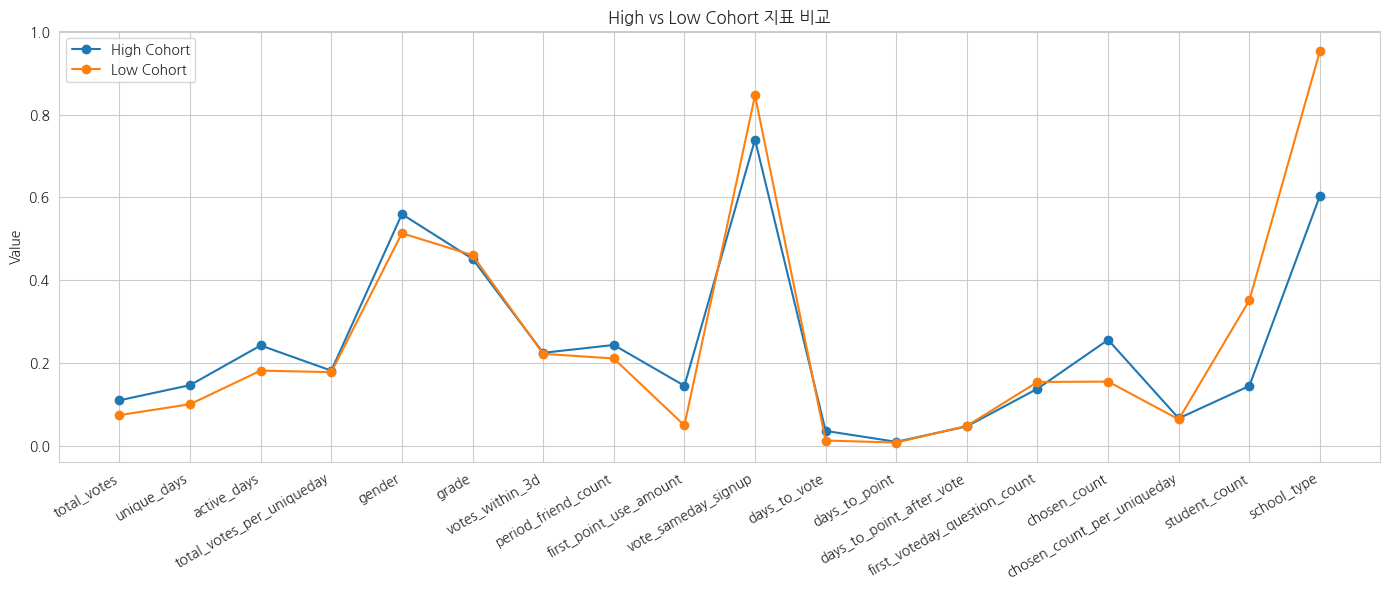

In [38]:
# high_분석, low_분석은 생성
high_cohort, low_cohort = cohort_cut_25(scaled_df)
high_분석 = table_v6_analysis(high_cohort)
low_분석 = table_v6_analysis(low_cohort)

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(high_분석['index'], high_분석[0], marker='o', label='High Cohort')
plt.plot(low_분석['index'], low_분석[0], marker='o', label='Low Cohort')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Value')
plt.title('High vs Low Cohort 지표 비교')
plt.legend()
plt.tight_layout()
plt.show()

# T-Test 설계하기

In [49]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

## 데이터 매니징

In [120]:
master_table = pd.read_csv('./integrated_master_table.csv')

drop_col = [
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote','ret_group','ret_group_over','ret_group_under'
    ]

user_table = master_table.drop(columns=drop_col).copy()

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['total_votes_per_acitiveday'] = per_day_cal(user_table['total_votes'], user_table['active_days']) 
user_table['total_voted_per_uniqueday'] = per_day_cal(user_table['total_voted'], user_table['unique_days'])
user_table['total_voted_per_acitiveday'] = per_day_cal(user_table['total_voted'], user_table['active_days'])
user_table['total_read_per_uniqueday'] = per_day_cal(user_table['total_read'], user_table['unique_days'])
user_table['total_read_per_acitiveday'] = per_day_cal(user_table['total_read'], user_table['active_days'])

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['days_to_point'].fillna(99, inplace=True)
user_table['days_to_point_after_vote'].fillna(99, inplace=True)
user_table.fillna(0, inplace=True)

In [39]:
master_table = pd.read_csv('./dataset/master_table_v6.csv')

drop_col = [
    'Unnamed: 0','user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote','retention_group'
    ]

user_table = master_table.drop(columns=drop_col).copy()

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['chosen_count_per_uniqueday'] = per_day_cal(user_table['chosen_count'], user_table['unique_days'])

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['days_to_point'].fillna(99, inplace=True)
user_table['days_to_point_after_vote'].fillna(99, inplace=True)
user_table.fillna(0, inplace=True)

In [40]:
high_cohort, low_cohort = cohort_cut_25(user_table)
high_cohort = high_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])
low_cohort = low_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])

## 샘플 사이즈 검정 (with power) 함수

In [41]:
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

In [42]:
def cal_samplesize(x,y):
    power_analysis = TTestIndPower()
    alpha = 0.05
    power = 0.8

    sample_size = power_analysis.solve_power(effect_size=cohen_d(x, y), alpha=alpha, power=power, alternative='two-sided')
    
    # print(f'''
    # alpha : {alpha}
    # power : {power}
    # 필요한 샘플 크기 (그룹당): {sample_size:.0f}
    # ''')
    
    # int로 변환, 올림처리로 예외 반영
    return int(np.ceil(sample_size)) 

## 정규성검정, 등분산검정, TTest 함수

In [43]:
def Normality_test(x,y):
    p1 = shapiro(x).pvalue
    p2 = shapiro(y).pvalue

    return ((p1 > 0.05) and (p2 > 0.05))

In [44]:
def Equal_var_test(x,y,normal):
    # 정규성을 만족하지 않으면, 등분산 검정을 진행하지 않음.
    
    if normal == True:
        p_var = levene(x,y).pvalue
        return (p_var > 0.05)
    
    return False
    

In [45]:
def T_Test(x,y,normal, equal_var):
    # 정규성, 등분산의 결과에 따라 수행하는 T-test 방법을 달리하고 방법을 기록
    
    if normal == True:
        t_stat, p_val = ttest_ind(x, y, equal_var=equal_var)
        test_used = 'T-test (equal_var)' if equal_var else "Welch T-Test"
    else:
        t_stat, p_val = mannwhitneyu(x,y, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    return t_stat, p_val, test_used

In [46]:
def result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val):
    result.append({
        'column':col,
        'sample_size':sample_size,
        'normality':normal,
        'equal_var':equal_var,
        'test':test_used,
        'statistic':t_stat,
        'p_value':p_val,
        'significant':p_val < 0.05
    })
    return result

In [47]:
def Statistic_test(result, x, y, random_state=42):
    # 컬럼명 기록
    col = x.name
    
    # 계산된 sample_size가 len보다 길 경우를 상정하고 예외
    sample_size = min(cal_samplesize(x,y), len(x), len(y)) 

    # 계산한 sample_size에 맞게, 각각의 x, y에서 샘플 추출
    x_sample = x.sample(n=sample_size, random_state=random_state)
    y_sample = y.sample(n=sample_size, random_state=random_state)

    # 정규성, 등분산성 검정 후 해당 결과를 바탕으로 T-test 진행
    normal = Normality_test(x_sample,y_sample)
    equal_var = Equal_var_test(x_sample,y_sample,normal)
    t_stat, p_val, test_used = T_Test(x_sample,y_sample,normal,equal_var)
    
    # 결과 저장
    result = result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val)

    return result

## T-Test 수행

In [50]:
result = []

for col in high_cohort:
    result = Statistic_test(result, high_cohort[col], low_cohort[col])
    

## 결과

In [51]:
result_df = pd.DataFrame(result)
result_df

,column,sample_size,normality,equal_var,test,statistic,p_value,significant
0,total_votes,80,False,False,Mann-Whitney U,3652.5,1.229423e-01,False
1,unique_days,53,False,False,Mann-Whitney U,1678.0,8.363099e-02,False
2,active_days,138,False,False,Mann-Whitney U,11785.0,6.404553e-04,True
3,gender,1138,False,False,Mann-Whitney U,681093.0,1.319330e-02,True
4,school_id,18,False,False,Mann-Whitney U,240.5,1.277352e-02,True
5,grade,1138,False,False,Mann-Whitney U,642147.0,7.142509e-01,False
6,group_id,83,False,False,Mann-Whitney U,4843.0,6.325483e-06,True
7,votes_within_3d,1138,False,False,Mann-Whitney U,654600.0,6.516330e-01,False
8,period_friend_count,274,False,False,Mann-Whitney U,44182.5,3.366732e-04,True
9,student_count,32,False,False,Mann-Whitney U,345.5,2.437586e-02,True


In [53]:
# random_state 조건 변화 시켜서 유효성 빈도 확인
sig_counts = {col: 0 for col in result_df['column']}

for random_state in range(1, 43):
    temp_result = []
    for col in high_cohort.columns:
        temp_result = Statistic_test(temp_result, high_cohort[col], low_cohort[col], random_state)
    temp_df = pd.DataFrame(temp_result)
    for idx, row in temp_df.iterrows():
        if row['significant']:
            sig_counts[row['column']] += 1

sig_counts_df = pd.DataFrame(list(sig_counts.items()), columns=['column', 'significant_count'])
sig_counts_df = sig_counts_df.sort_values(by='significant_count', ascending=False).reset_index(drop=True)
sig_counts_df

,column,significant_count
0,chosen_count_per_uniqueday,42
1,active_days,42
2,first_voteday_question_count,42
3,first_point_use_amount,42
4,student_count,39
5,group_id,39
6,gender,37
7,vote_sameday_signup,37
8,unique_days,37
9,firstquestion_id,36


In [ ]:
# T-test 검정 방식에 대한 카운팅 추가

sig_counts = {col: 0 for col in result_df['column']}
test_counts = {col : {'T-Test': 0, 'Welch T-Test':0, 'Mann-Whitney U':0} for col in result_df['column']}

for random_state in range(1, 43):
    temp_result = []
    for col in high_cohort.columns:
        temp_result = Statistic_test(temp_result, high_cohort[col], low_cohort[col], random_state)
    temp_df = pd.DataFrame(temp_result)
    
    for idx, row in temp_df.iterrows():
        col_name = row['column']
        if row['significant']:
            sig_counts[row['column']] += 1
        test_counts[col_name][row['test']] += 1

rows = []
for col in sig_counts:
    row = {
        'column' : col,
        'significant_count' : sig_counts[col],
        'T-Tset' : test_counts[col].get('T-Test',0),
        'Welch T-Test' : test_counts[col].get('Welch T-Test',0),
        'Mann-Whitney U' : test_counts[col].get('Mann-Whitney U',0)
    }
    rows.append(row)

sig_counts_df = pd.DataFrame(rows)
sig_counts_df = sig_counts_df.sort_values(by='significant_count', ascending=False).reset_index(drop=True)
sig_counts_df

In [55]:
user_table.columns

Index(['total_votes', 'unique_days', 'first_vote', 'active_days', 'cohort_day',
       'retention_day8', 'gender', 'school_id', 'grade', 'group_id',
       'votes_within_3d', 'period_friend_count', 'student_count',
       'school_type', 'firstquestion_id', 'chosen_count',
       'first_point_use_amount', 'vote_sameday_signup', 'days_to_vote',
       'days_to_point', 'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_votes_per_uniqueday',
       'chosen_count_per_uniqueday'],
      dtype='object')

In [62]:
df = user_table[['active_days','unique_days','chosen_count']]

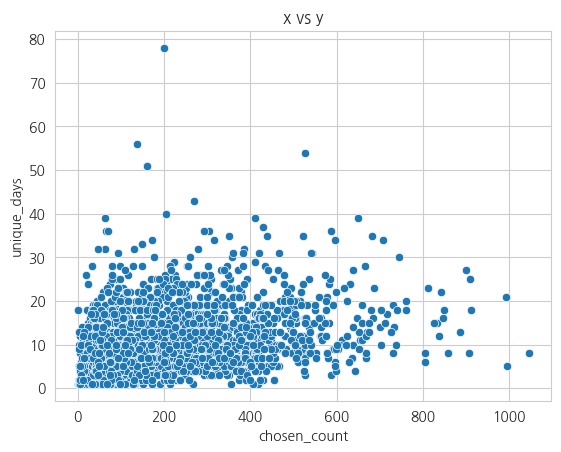

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='chosen_count', y='unique_days', data=df)
plt.title('x vs y')
plt.show()
